# Project 1: First steps in Machine Learning (40 Points)
In this project, you will train and test your first machine learning models. Please follow the **TODO**s in this notebook. There are practical and theoretical tasks to do.<br>
When working on the tasks please consider the following information:
* write short texts in **full sentences** answering the TODOs. Note, that analyzing the theoratical parts of the project give roughly 2/3 of all points
* when describing classifiers explain at least the training, testing, and the hyper-parameters
* always train your models using the given training sets
* evaluate the models using the given test sets
* have a look at all imports in this notebook; they already define which method you should use

You should work in a group of 3. Please enter your names and your TA here.<br>
Students: Basel Ammo & Linus Behrbohm<br>
TA: Yasir Plückebaum

On Monday, **7th December**, there will be a Q&A session in the tutorials! Start to work on this project from now on and take the offer to resolve any remaining ambiguity.
This assignment is due on **Sunday, 29.11.2020 11:59pm**. Please upload your solution to the Lernraum+.<br>
 For a submission you need to be part of a assignment group.

## kNN - Classifier

In [68]:
import numpy as np
# load dataset 1
data_set = np.load('dataset_1.npz')
X_train = data_set['X_train']
X_test = data_set['X_test']
y_train = data_set['y_train']
y_test = data_set['y_test']

### The first dataset

**TODO:** Describe the data

         Sample Count     Shape
X_train          1072  (536, 2)
X_test            528  (264, 2)
y_train           536    (536,)
y_test            264    (264,)


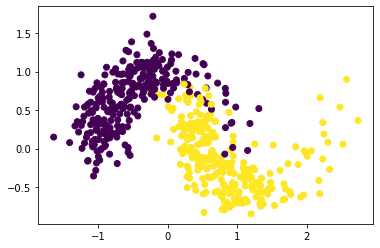

In [149]:
# TODO: take a closer look at the dataset, e.g. number of samples, dimensionality, labels, etc.
import pandas as pd
import matplotlib.pyplot as plt

def property_table(fs, data_set):
    keys = list(data_set.keys()) # row names
    props = list(map(lambda f: f[0], fs)) # column names
    funcs = list(map(lambda f: f[1], fs)) # property functions
    items = list(map(lambda t: t[1], data_set.items())) # data items
    data = zip(*list(map(lambda f: map(f, items), funcs)))
    return pd.DataFrame(data, index=keys, columns=props)
    
data_frame = property_table([
        ('Sample Count', lambda item: item.size),
        ('Shape', lambda item: item.shape),
    ], data_set)

print(data_frame)
plt.scatter(*zip(*X_train), c=y_train)

### the Model

The kNN-Classifier learns a probability distribution in a space based on a set of input points with previously assigned classes, i.e. by supervised training. There can be any number of classes. The kNN-Classifier calculates the probability of any new point belonging to a specific class as the proportion of points from the k nearest known points with that specific class. I.e. for any given point x, the probability to belong to a specific class c is calculated by the number of points with class c in the nearest k points of x, divided by k. The predicted class by the kNN-Classifier is the class with the maximum probability.

In [120]:
# TODO: train a kNN classifier with k=5 on the training set and test it with the test set

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import functools
foldl = lambda acc, f, xs: functools.reduce(f, xs, acc)

def train_and_predict_knn(k, data_set):
    X_train = data_set['X_train']
    X_test = data_set['X_test']
    y_train = data_set['y_train']
    y_test = data_set['y_test']
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y=knn_classifier.predict(X_test)
    if y_test.size == 0: return 1
    return foldl(0, lambda acc, t: acc + (t[0]==t[1]), zip(y, y_test))/y_test.size

train_and_predict_knn(5, data_set)
print(accuracy)

0.9810606060606061


The kNN-Classifier with k=5 reached a 98% accuracy on the test data set.

The best choice for k in [1, 536] is 5 with an accuracy of 0.9810606060606061


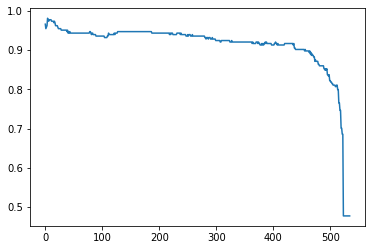

In [156]:
# TODO: train and test the kNN classifier for different values of k on dataset 1.
#       Plot the accuracy for different values of k. Choose usefull lower and upper bounds for k.
import matplotlib.pyplot as plt
lo = 1
hi = 536
accuracies = list(map(lambda k: train_and_predict_knn(k, data_set), range(lo,hi)))
plt.plot(accuracies)
max_index = max(range(0, len(accuracies)), key=lambda i: accuracies[i])
print('The best choice for k in [{}, {}] is {} with an accuracy of {}'.format(lo, hi, max_index+lo, accuracies[max_index]))

**TODO:** Answer the following questions in a **full text**.

* Describe your choice of values of k. Why did you choose them?
* For which values of k does the model perform best?
* Would this value perform best on another dataset as well?
* How can k be choosen?
* What is the smallest and the greatest possible value for k? What would happen if we would choose these special values?

I chose values 1 between 20. I first tried 1 to 100, but I noticed that there was a lot of accuracy loss at higher values for k. I also assumed that sensible values for k would probably not be far away from the default (5). And the best value (in 1 to 100) for this dataset did in fact turn out to be 5. This is probably very different depending on the dataset. For sparse datasets it may be better to choose higher values of k, 

## Logistic Regression
Let's try another model as well.

### the Dataset

In [ ]:
# TODO: load dataset_2.npz and analyze the dataset

**TODO:** Describe the data

### the Model

**TODO:** Describe the logistic regression model

In [ ]:
# TODO: train and test logistic regression on dataset_2.npz (using the training and test set),
# plot the dataset and the decision boundary, own implementation needed (see lecture slide 51 in slides1.pdf)

from sklearn.linear_model import LogisticRegression


**TODO:** Report your results.

In [ ]:
# TODO: Check whether w separates the two classes.
#       How does the negative log-likelihood (NLL) change for αw as α goes to infinity?
#
# Hint: Implement an own function which computes the NLL for a new w, and report the NLL for different values.

**TODO:** What can you infer from your observations regarding the training of a model?

### thoeretical considerations

**TODO:** Prove that 

$$\lim_{\alpha\to\infty}-\log\left(P\left(\left.\mathcal{D}\right|\vec{w}\right)\right)=0$$
if $\vec{w}$ splits the data perfectly where $\mathcal{D}$ represents the data.

**Hint:** You can analyze both cases, y=0 and y=1, and find a limit of the likelihood for one sample. Then, calculate the limit of the negative log-likelihood.


## Comparing kNN and Logistic Regression
Finally, we want you to compare the kNN and the logistic regression classifier.

In [ ]:
# TODO: train both kNN and logistic regression on the training set for both datasets.
#       Evaluate the models using the respective test set.
# Plot the data and the decision boundary of the classifiers. plot_2d_decisionboundary() in utils.py can be used.

from utils import plot_2d_decisionboundary
from utils import plot_classification_dataset


**TODO:** Describe your results and analyze them: Is one model performing better than the other? Is there a difference in the datasets causing this behavior?